In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN, GRU

In [2]:
# 데이터 불러오기
df = pd.read_csv('./삼성전자_stock.csv')

In [3]:
df.head()

,Unnamed: 0,날짜,종가,전일비,시가,고가,저가,거래량
0,0,2024.04.24,78600,3100,77500,78800,77200,21804564
1,1,2024.04.23,75500,-600,76400,76800,75500,18717699
2,2,2024.04.22,76100,-1500,77400,77500,75100,30469477
3,3,2024.04.19,77600,-2000,78300,78700,76300,31317563
4,4,2024.04.18,79600,700,78800,80100,78300,21370190


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6970 entries, 0 to 6969
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6970 non-null   int64 
 1   날짜          6970 non-null   object
 2   종가          6970 non-null   int64 
 3   전일비         6970 non-null   int64 
 4   시가          6970 non-null   int64 
 5   고가          6970 non-null   int64 
 6   저가          6970 non-null   int64 
 7   거래량         6970 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 435.8+ KB


In [5]:
# datetime 컬럼 생성
df['날짜'] = pd.to_datetime(df['날짜'])

In [6]:
print(df.head())
print(df.tail())

   Unnamed: 0         날짜     종가   전일비     시가     고가     저가       거래량
0           0 2024-04-24  78600  3100  77500  78800  77200  21804564
1           1 2024-04-23  75500  -600  76400  76800  75500  18717699
2           2 2024-04-22  76100 -1500  77400  77500  75100  30469477
3           3 2024-04-19  77600 -2000  78300  78700  76300  31317563
4           4 2024-04-18  79600   700  78800  80100  78300  21370190
      Unnamed: 0         날짜     종가   전일비     시가     고가     저가    거래량
6965        6965 1996-07-10  70600 -1100  71700  72000  70500  99200
6966        6966 1996-07-09  71700   800  70900  71700  70100  64910
6967        6967 1996-07-08  70900  -600  71600  71600  70800  62100
6968        6968 1996-07-06  71500   200  71300  72700  71300  35510
6969        6969 1996-07-05  71300  -600  72000  72300  71000  77960


In [7]:
#불필요한 columns 제거
del df['Unnamed: 0']

In [8]:
df['change'] = df['종가'].pct_change(periods=-1)

In [9]:
df.head()

,날짜,종가,전일비,시가,고가,저가,거래량,change
0,2024-04-24,78600,3100,77500,78800,77200,21804564,0.041060
1,2024-04-23,75500,-600,76400,76800,75500,18717699,-0.007884
2,2024-04-22,76100,-1500,77400,77500,75100,30469477,-0.019330
3,2024-04-19,77600,-2000,78300,78700,76300,31317563,-0.025126
4,2024-04-18,79600,700,78800,80100,78300,21370190,0.008872


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6970 entries, 0 to 6969
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      6970 non-null   datetime64[ns]
 1   종가      6970 non-null   int64         
 2   전일비     6970 non-null   int64         
 3   시가      6970 non-null   int64         
 4   고가      6970 non-null   int64         
 5   저가      6970 non-null   int64         
 6   거래량     6970 non-null   int64         
 7   change  6969 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 435.8 KB


In [11]:
# 누락된 데이터 확인
df.isnull().count()
df.isna().count()

날짜        6970
종가        6970
전일비       6970
시가        6970
고가        6970
저가        6970
거래량       6970
change    6970
dtype: int64

In [12]:
# 결측치 삭제
df.dropna(subset=['날짜'], inplace=True)

In [13]:
# 누락된 데이터 확인
df.isna().count()

날짜        6970
종가        6970
전일비       6970
시가        6970
고가        6970
저가        6970
거래량       6970
change    6970
dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/pyt

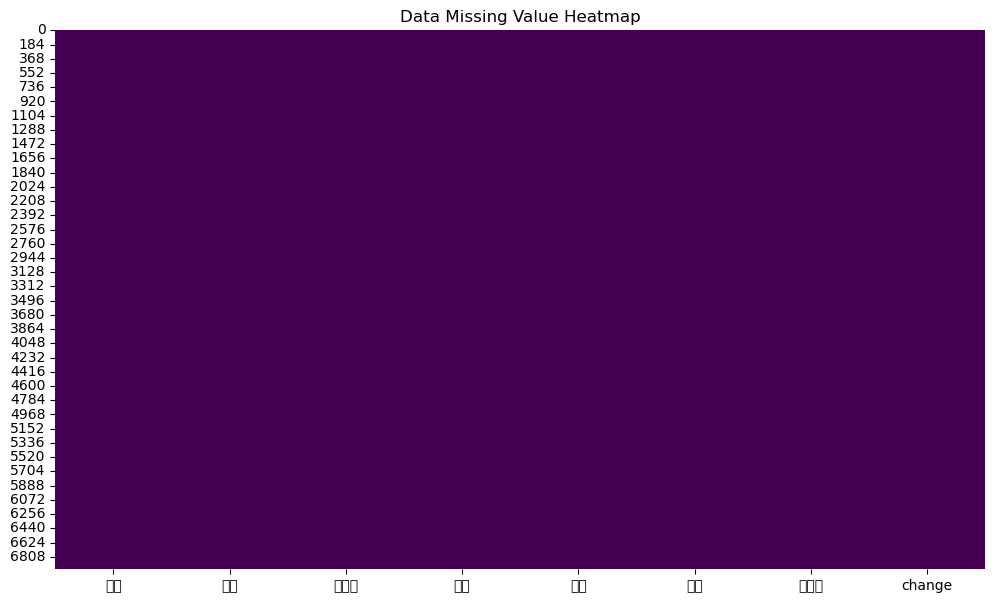

In [14]:
# 결측치 확인 시각화
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Data Missing Value Heatmap')

# 플롯팅
plt.show()

In [15]:
df.drop(['날짜'], axis=1).describe() # 통계적 요약 정보 제공
# count: 비어 있지 않은 값의 개수
# mean: 평균값
# std: 표준 편차
# min: 최소값
# 25%: 1사분위수 (하위 25%)
# 50%: 중앙값 또는 2사분위수 (하위 50%)
# 75%: 3사분위수 (하위 75%)
# max: 최대값

,종가,전일비,시가,고가,저가,거래량,change
count,6.970000e+03,6970.000000,6.970000e+03,6.970000e+03,6.970000e+03,6.970000e+03,6969.000000
mean,5.985879e+05,373.558106,5.974436e+05,6.040803e+05,5.907382e+05,3.694111e+06,0.000745
std,6.079793e+05,14944.856005,6.066703e+05,6.122488e+05,6.009034e+05,7.222623e+06,0.027494
min,3.330000e+04,-141000.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.980415
25%,7.242500e+04,-4000.000000,7.240000e+04,7.300000e+04,7.160000e+04,2.725348e+05,-0.011966
50%,4.460000e+05,0.000000,4.475000e+05,4.525000e+05,4.407500e+05,4.809675e+05,0.000000
75%,8.737500e+05,4500.000000,8.740000e+05,8.825000e+05,8.642500e+05,1.146162e+06,0.012360
max,2.861000e+06,107000.000000,2.875000e+06,2.876000e+06,2.838000e+06,9.030618e+07,0.150000


In [16]:
df[df['전일비']==-141000.000]

,날짜,종가,전일비,시가,고가,저가,거래량,change
1577,2017-11-27,2632000,-141000,2768000,2768000,2632000,362578,-0.050847


In [17]:
from datetime import datetime
after_df = df[df['날짜']>'2017-11-27']
after_df

,날짜,종가,전일비,시가,고가,저가,거래량,change
0,2024-04-24,78600,3100,77500,78800,77200,21804564,0.041060
1,2024-04-23,75500,-600,76400,76800,75500,18717699,-0.007884
2,2024-04-22,76100,-1500,77400,77500,75100,30469477,-0.019330
3,2024-04-19,77600,-2000,78300,78700,76300,31317563,-0.025126
4,2024-04-18,79600,700,78800,80100,78300,21370190,0.008872
...,...,...,...,...,...,...,...,...
1572,2017-12-04,2567000,25000,2542000,2567000,2501000,297301,0.009835
1573,2017-12-01,2542000,2000,2540000,2589000,2540000,257372,0.000787
1574,2017-11-30,2540000,-90000,2540000,2593000,2510000,592683,-0.034221
1575,2017-11-29,2630000,-34000,2660000,2662000,2625000,191805,-0.012763


In [18]:
# 시간순별  sorting
df_before = df.sort_values(by='날짜')

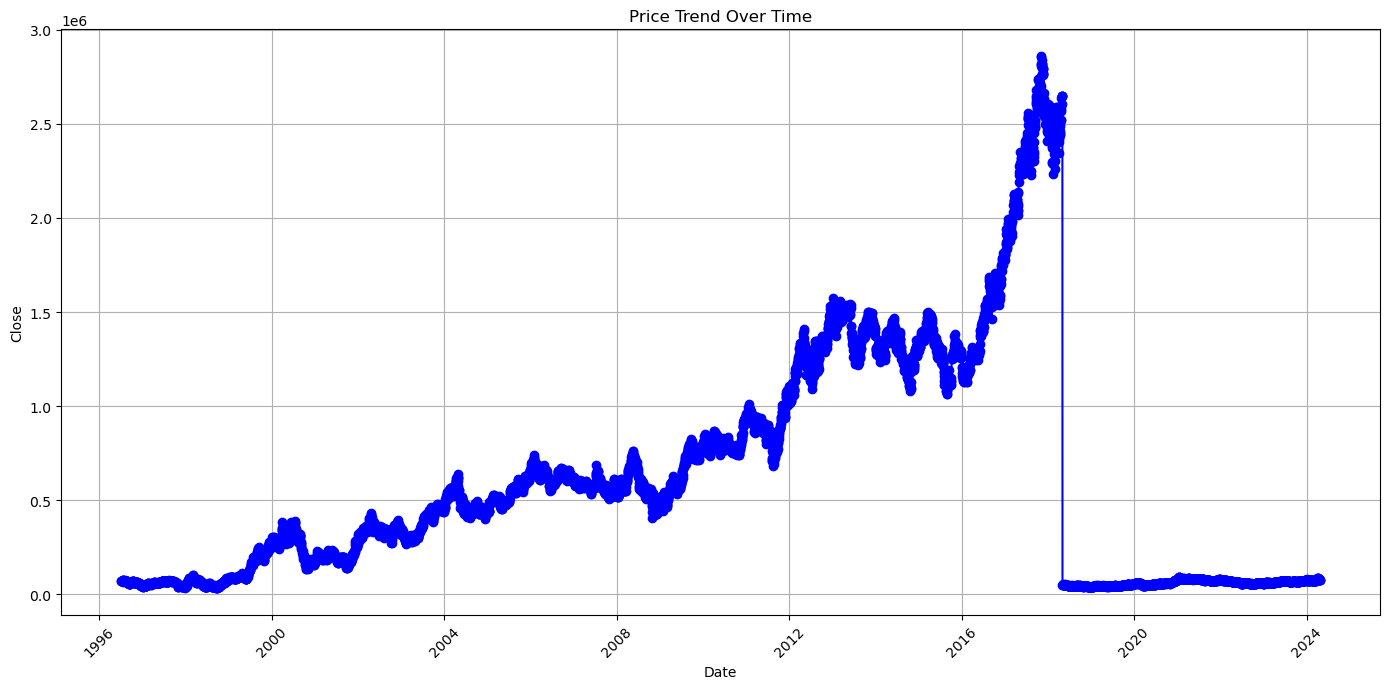

In [19]:
# Plotting
plt.figure(figsize=(14,7))
plt.plot(df_before['날짜'], df_before['종가'], marker='o', linestyle='-', color='b')
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  #
plt.show()

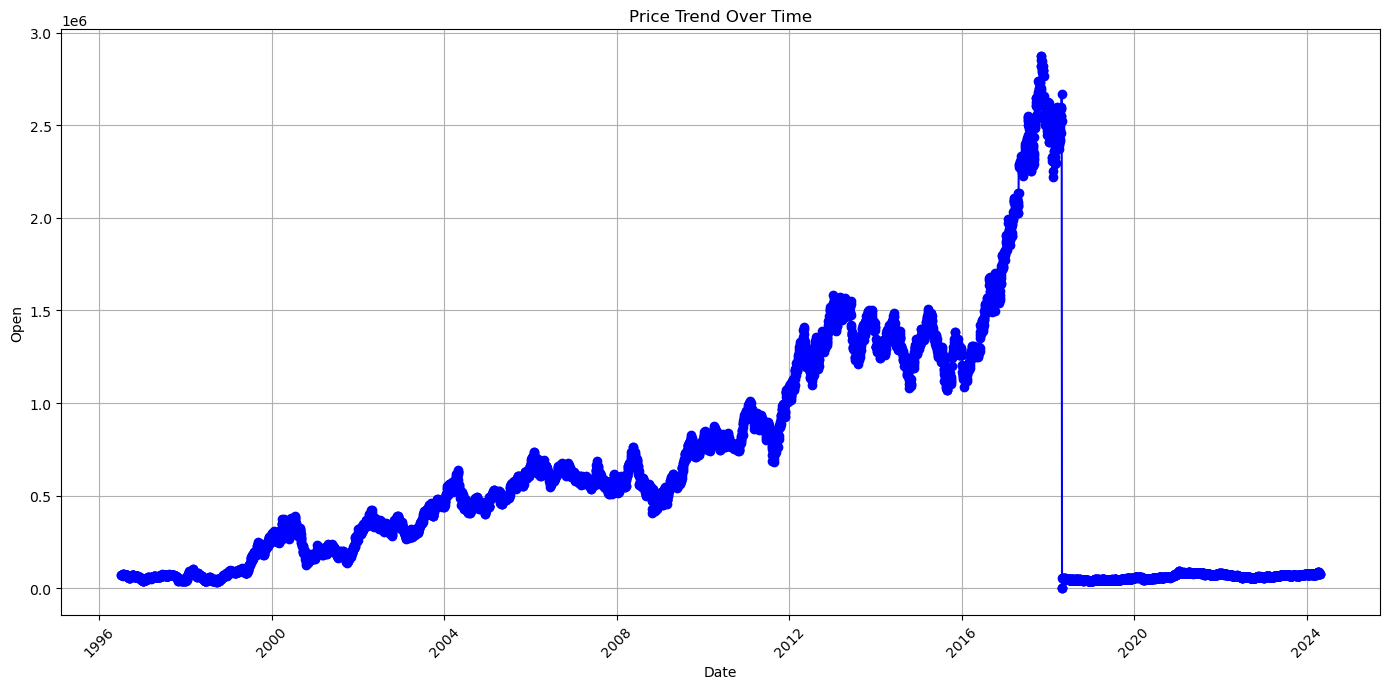

In [20]:
# Plotting
plt.figure(figsize=(14,7))
plt.plot(df_before['날짜'], df_before['시가'], marker='o', linestyle='-', color='b')
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Open')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  #
plt.show()

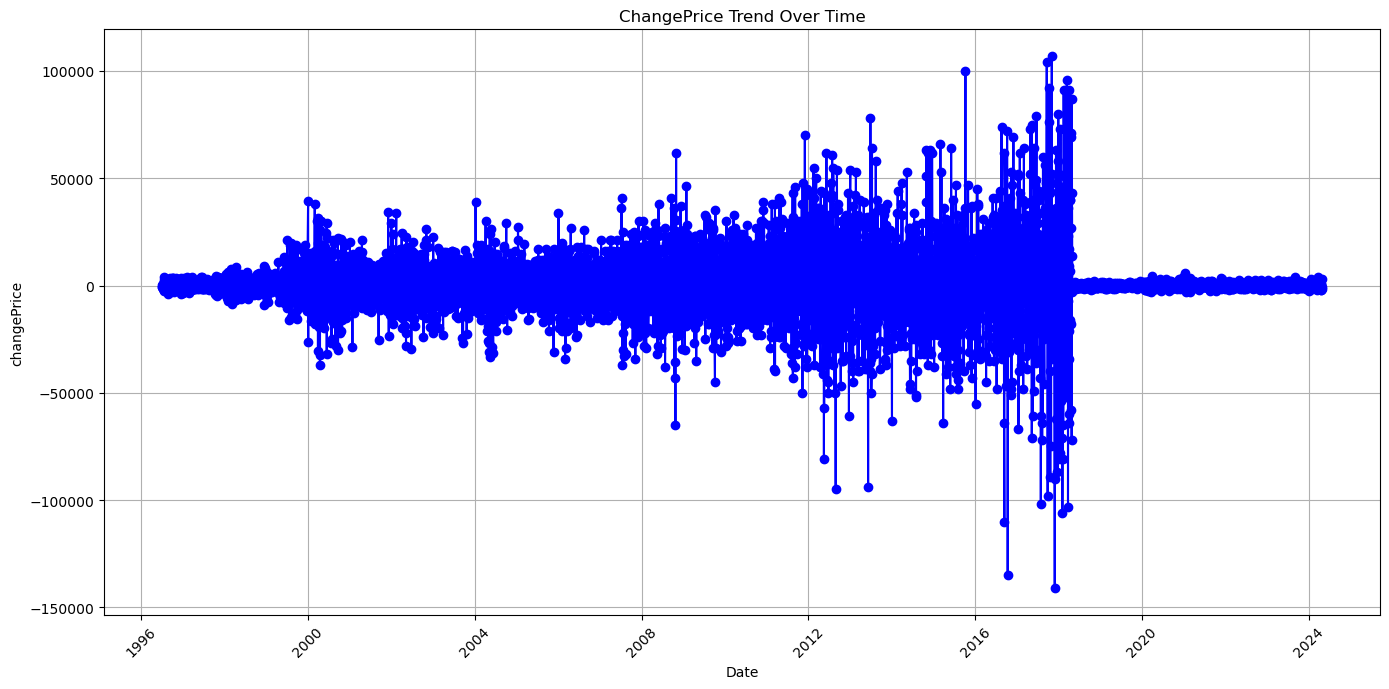

In [21]:
# Plotting
plt.figure(figsize=(14,7))
plt.plot(df_before['날짜'], df_before['전일비'], marker='o', linestyle='-', color='b')
plt.title('ChangePrice Trend Over Time')
plt.xlabel('Date')
plt.ylabel('changePrice')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  #
plt.show()

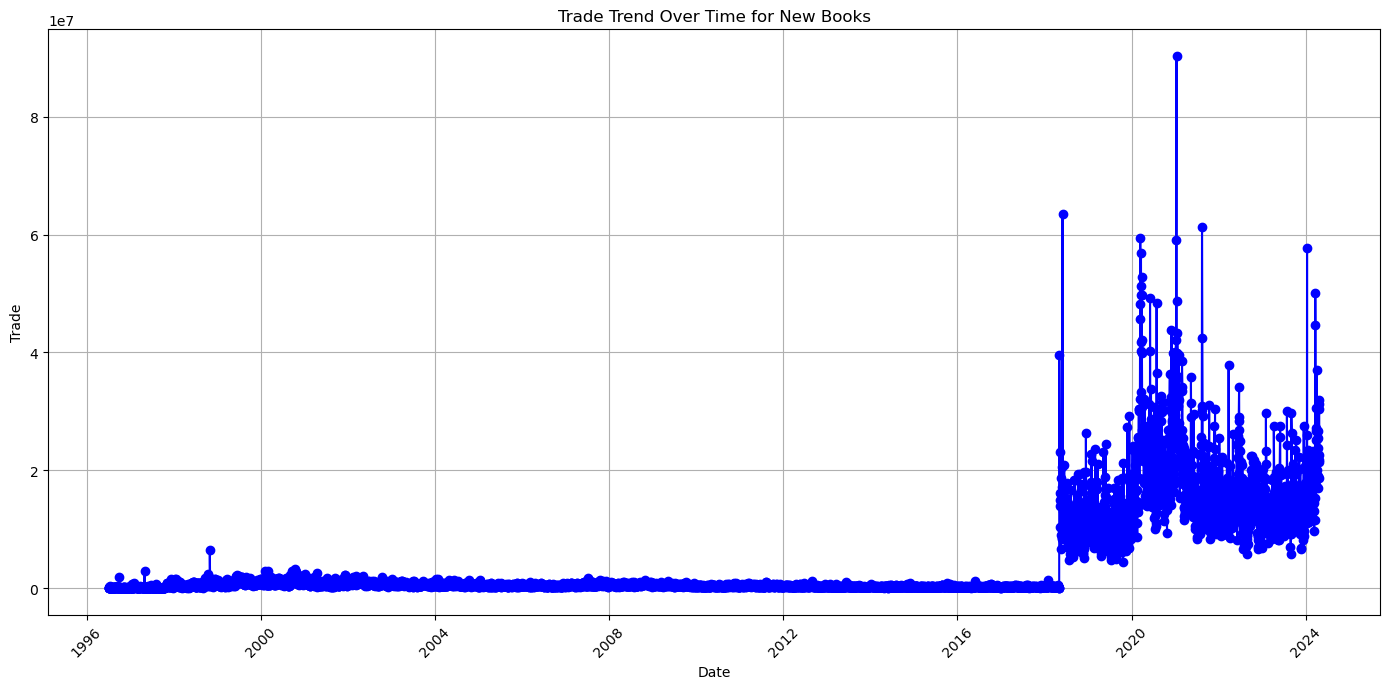

In [22]:
# Plotting
plt.figure(figsize=(14,7))
plt.plot(df_before['날짜'], df_before['거래량'], marker='o', linestyle='-', color='b')
plt.title('Trade Trend Over Time for New Books')
plt.xlabel('Date')
plt.ylabel('Trade')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  #
plt.show()

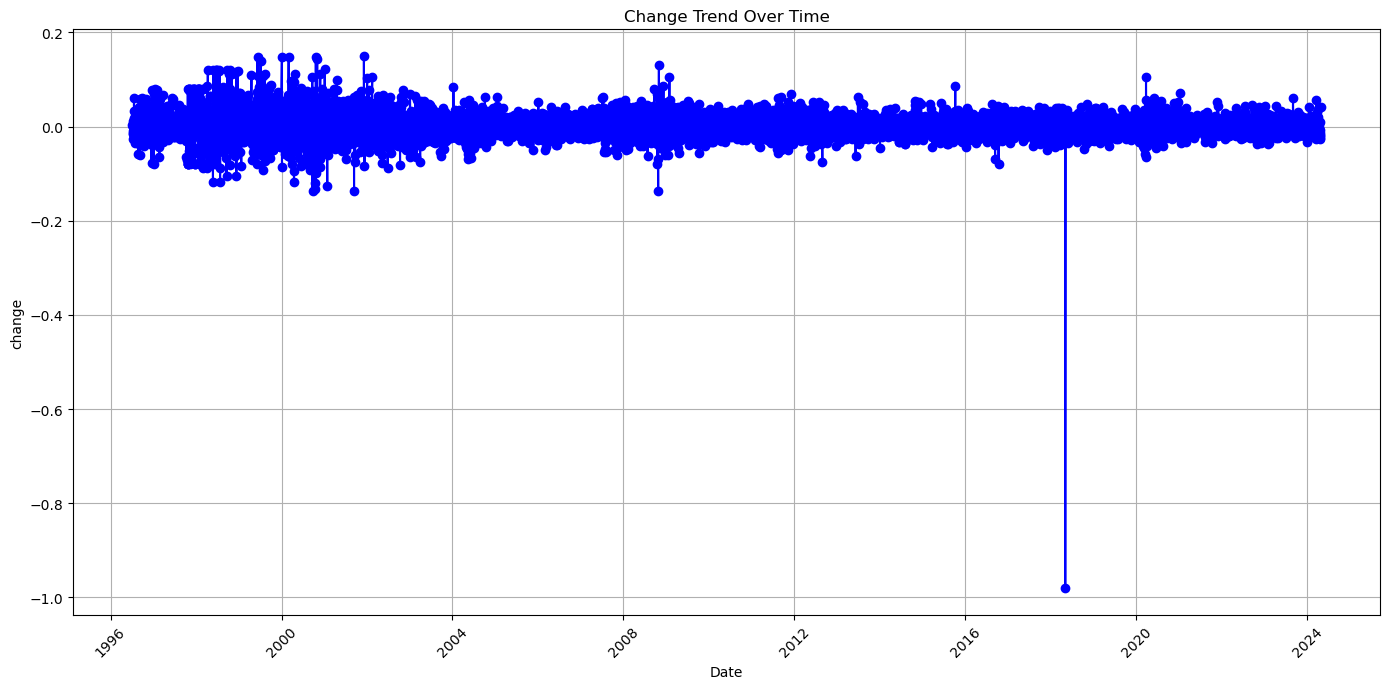

In [23]:
# Plotting
plt.figure(figsize=(14,7))
plt.plot(df_before['날짜'], df_before['change'], marker='o', linestyle='-', color='b')
plt.title('Change Trend Over Time')
plt.xlabel('Date')
plt.ylabel('change')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  #
plt.show()

In [24]:
# 숫자형 열만 선택
numeric_columns = df_before.select_dtypes(include=['float64', 'int64'])

In [25]:
# 상관 행렬 계산
corr_matrix = numeric_columns.corr()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/pytho

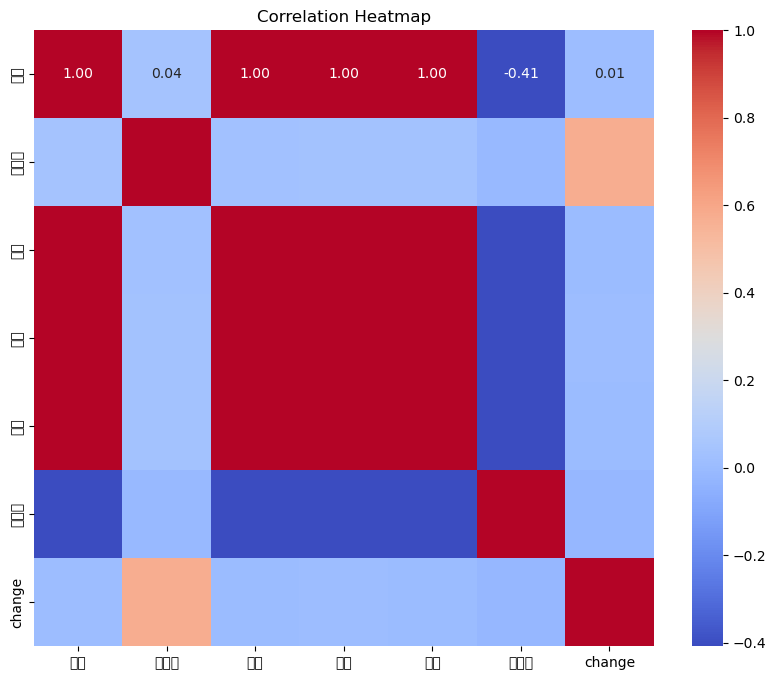

In [26]:
# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

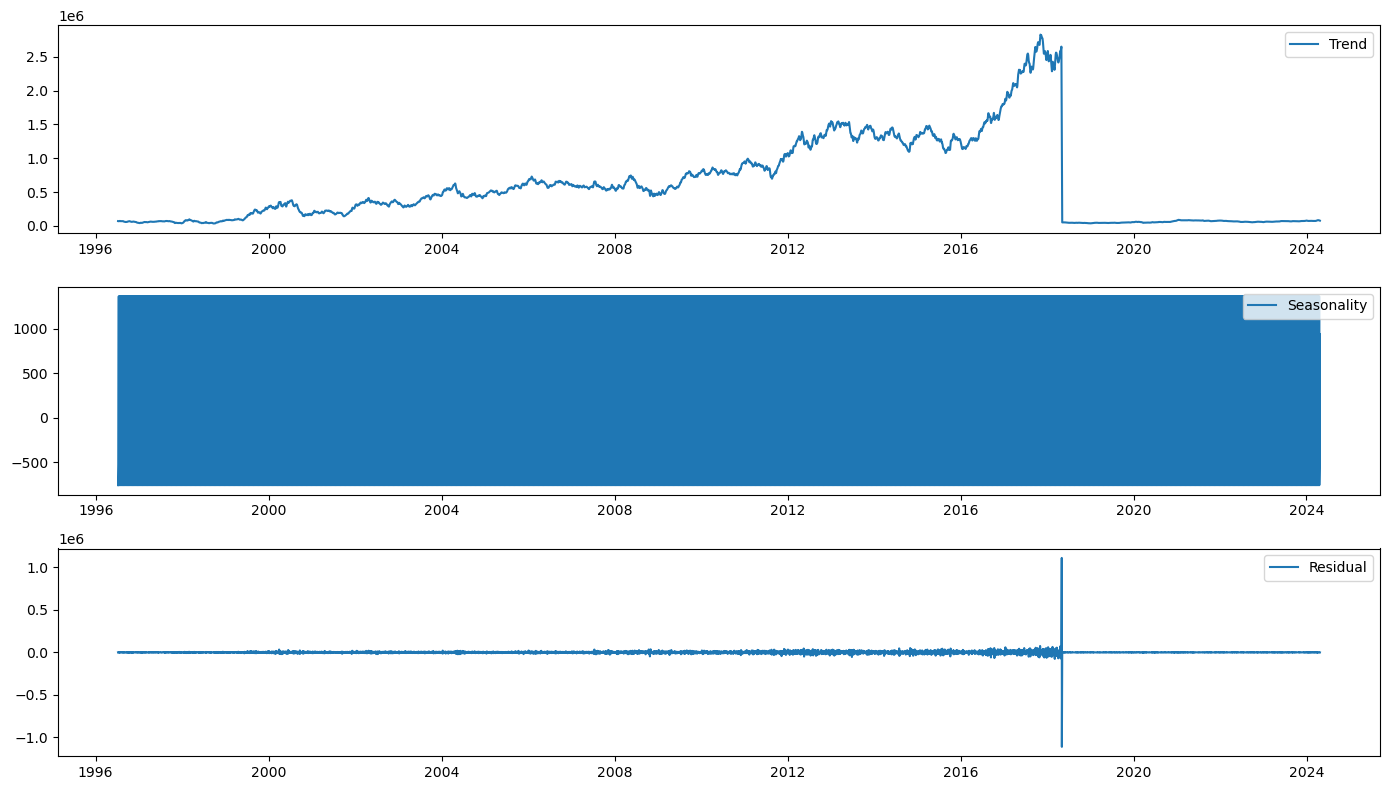

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 세팅
# 인덱스로 출판 날짜 설정,  빈도 일별('D')로 설정
ts_data = df_before.set_index('날짜').resample('D').mean().interpolate()

# 시계열 분해 수행
# 데이터를 트렌드, 계절성, 잔차로 분해.
decomposition = seasonal_decompose(ts_data['종가'], model='additive')

# 시각화
plt.figure(figsize=(14, 8))

# 트렌드(Trend)
plt.subplot(311)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.tight_layout()

# 계절성(Seasonality)
plt.subplot(312)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()

# 잔차(Residual)
plt.subplot(313)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

**코드 이상치 확인 후 처리**

In [28]:
df_new = df

In [29]:
df_new.tail()

,날짜,종가,전일비,시가,고가,저가,거래량,change
6965,1996-07-10,70600,-1100,71700,72000,70500,99200,-0.015342
6966,1996-07-09,71700,800,70900,71700,70100,64910,0.011283
6967,1996-07-08,70900,-600,71600,71600,70800,62100,-0.008392
6968,1996-07-06,71500,200,71300,72700,71300,35510,0.002805
6969,1996-07-05,71300,-600,72000,72300,71000,77960,NaN


In [30]:
df_new.describe()

,날짜,종가,전일비,시가,고가,저가,거래량,change
count,6970,6.970000e+03,6970.000000,6.970000e+03,6.970000e+03,6.970000e+03,6.970000e+03,6969.000000
mean,2010-03-19 13:05:54.318508032,5.985879e+05,373.558106,5.974436e+05,6.040803e+05,5.907382e+05,3.694111e+06,0.000745
min,1996-07-05 00:00:00,3.330000e+04,-141000.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.980415
25%,2003-03-04 06:00:00,7.242500e+04,-4000.000000,7.240000e+04,7.300000e+04,7.160000e+04,2.725348e+05,-0.011966
50%,2010-03-10 12:00:00,4.460000e+05,0.000000,4.475000e+05,4.525000e+05,4.407500e+05,4.809675e+05,0.000000
75%,2017-03-22 18:00:00,8.737500e+05,4500.000000,8.740000e+05,8.825000e+05,8.642500e+05,1.146162e+06,0.012360
max,2024-04-24 00:00:00,2.861000e+06,107000.000000,2.875000e+06,2.876000e+06,2.838000e+06,9.030618e+07,0.150000
std,NaN,6.079793e+05,14944.856005,6.066703e+05,6.122488e+05,6.009034e+05,7.222623e+06,0.027494


In [31]:
# # 증감률의 이상치 확인 및 처리
# z_scores = np.abs((df_new['change'] - df_new['change'].mean()) / df_new['change'].std())
# outliers = z_scores > 3

# # 이상치 값에 대한 처리
# df_new.loc[outliers, 'change'] = np.median(df_new['change'])  # 이상치를 중간값으로 대체

# # 증감률 이상치가 처리된 후의 종가 데이터 재계산(선택적)
# df_new['종가'] = df_new['종가'].iloc[0] * (1 + df_new['change']).cumprod()
# df_new['시가'] = df_new['종가'].iloc[0] * (1 + df_new['change']).cumprod()

In [32]:
# 증감률의 이상치 확인 및 처리
z_scores = np.abs((df_new['change'] - df_new['change'].mean()) / df_new['change'].std())
outliers = z_scores > 3

# 이상치 값에 대한 처리
df_new.loc[outliers, 'change'] = np.median(df_new['change'])  # 이상치를 중간값으로 대체

# 증감률 이상치가 처리된 후의 종가 데이터 재계산(선택적)
for column in ['종가', '시가', '고가', '저가']:
    df_new[column] = df_new[column].iloc[0] * (1 + df_new['change']).cumprod()

In [33]:
df_new.head()

,날짜,종가,전일비,시가,고가,저가,거래량,change
0,2024-04-24,81827.284768,3100,80682.119205,82035.496689,80369.801325,21804564,0.041060
1,2024-04-23,81182.128778,-600,80045.992116,81388.699080,79736.136662,18717699,-0.007884
2,2024-04-22,79612.886598,-1500,78498.711340,79815.463918,78194.845361,30469477,-0.019330
3,2024-04-19,77612.562814,-2000,76526.381910,77810.050251,76230.150754,31317563,-0.025126
4,2024-04-18,78301.140684,700,77205.323194,78500.380228,76906.463878,21370190,0.008872


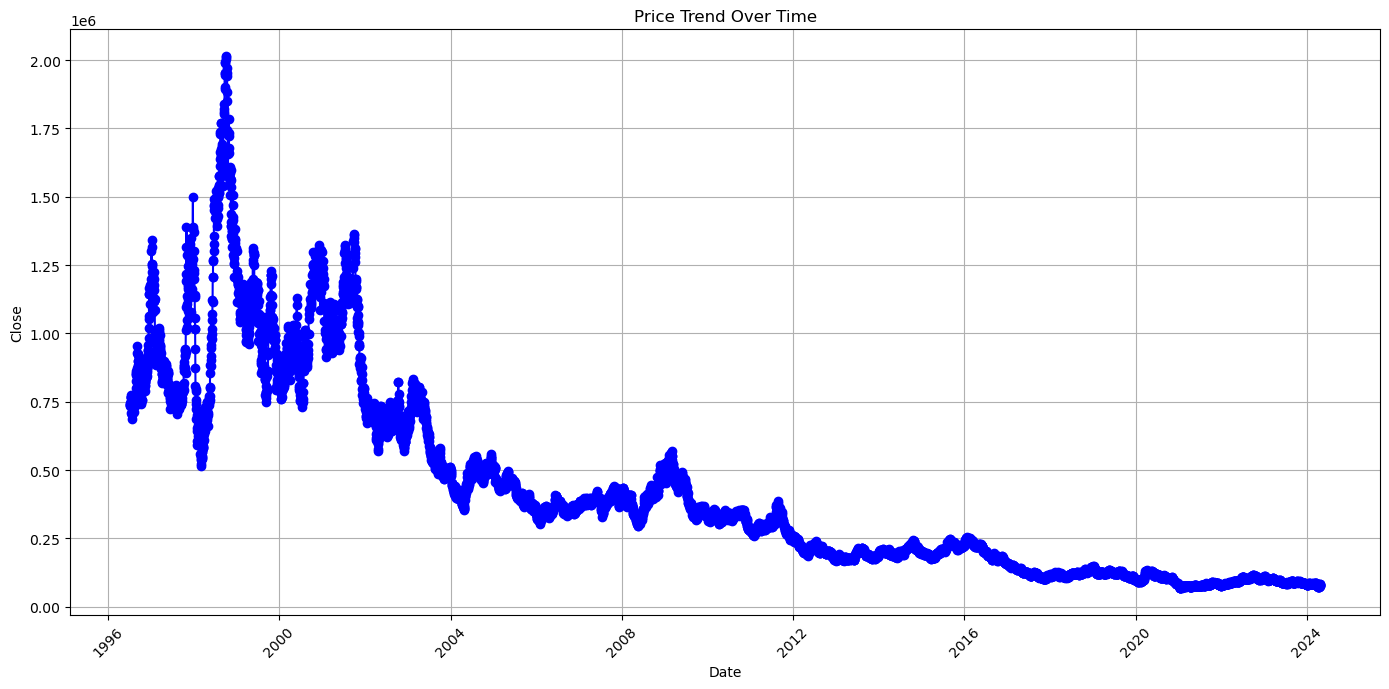

In [49]:
# Plotting
plt.figure(figsize=(14,7))
plt.plot(df_new['날짜'], df_new['종가'], marker='o', linestyle='-', color='b')
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  #
plt.show()

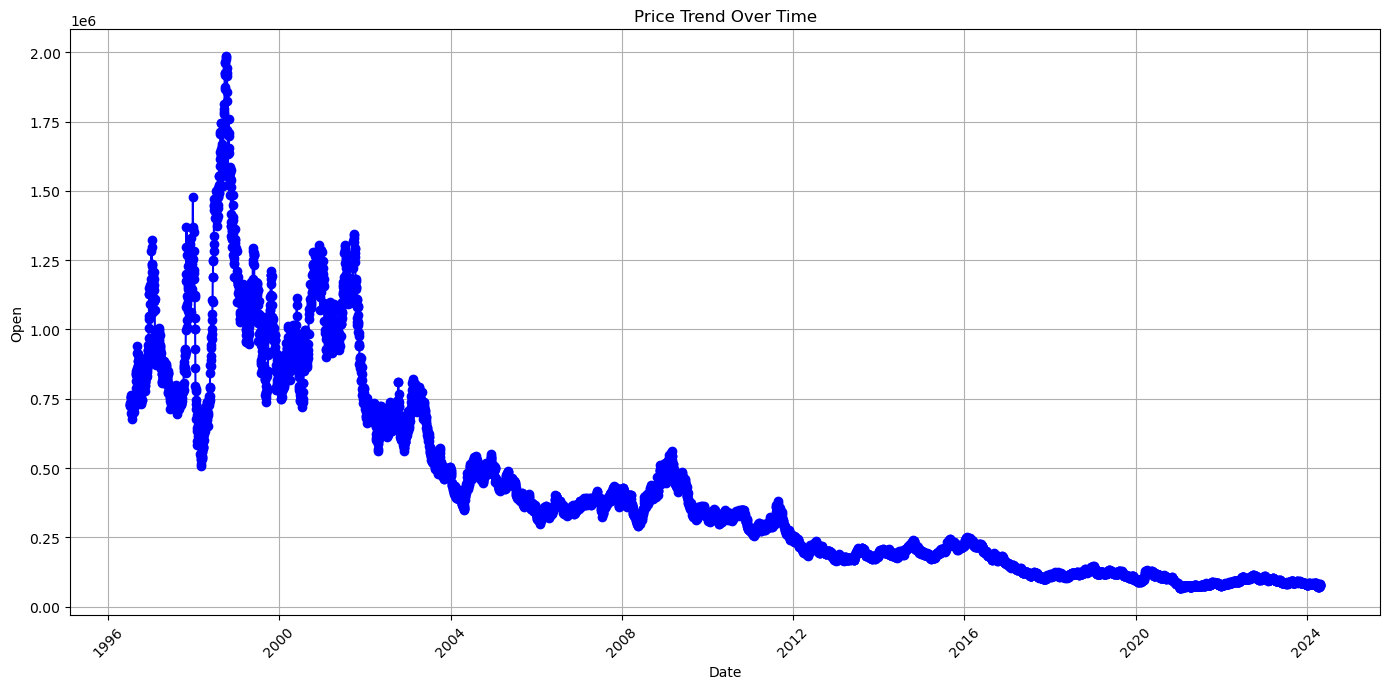

In [35]:
# Plotting
plt.figure(figsize=(14,7))
plt.plot(df_new['날짜'], df_new['시가'], marker='o', linestyle='-', color='b')
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Open')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  #
plt.show()

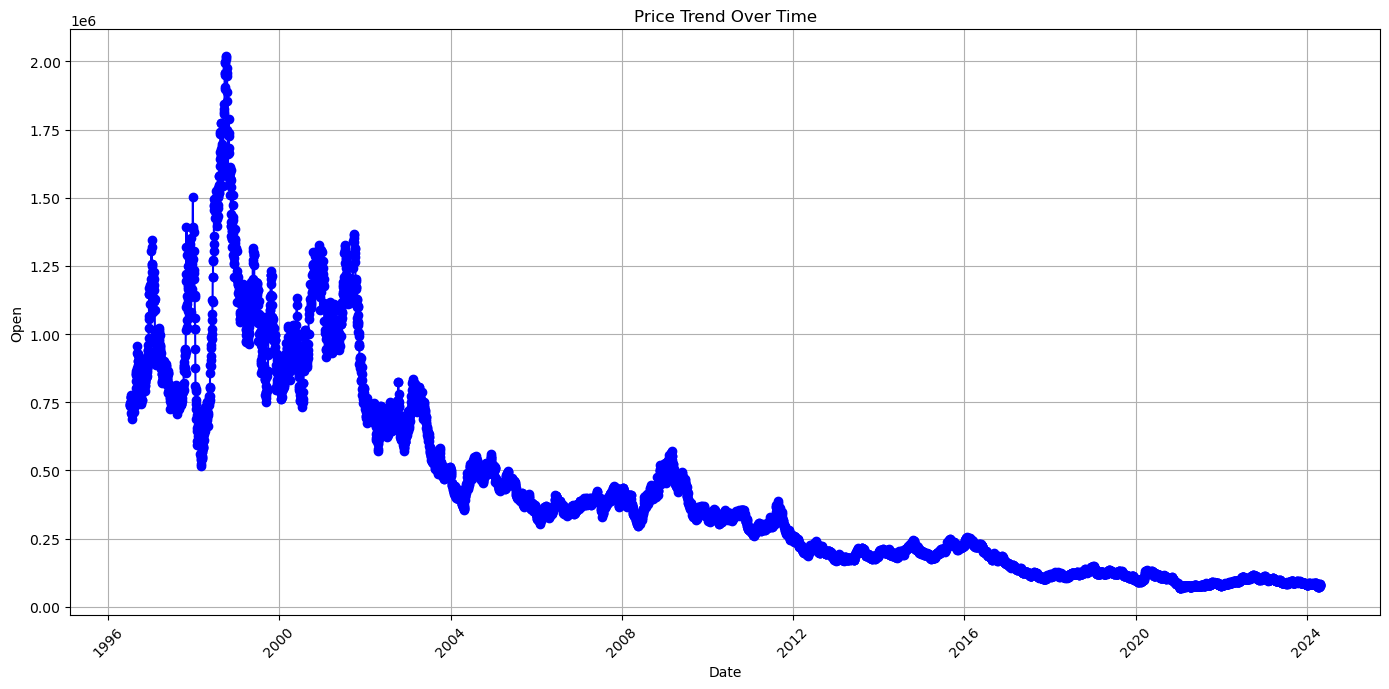

In [36]:
# Plotting
plt.figure(figsize=(14,7))
plt.plot(df_new['날짜'], df_new['고가'], marker='o', linestyle='-', color='b')
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Open')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  #
plt.show()

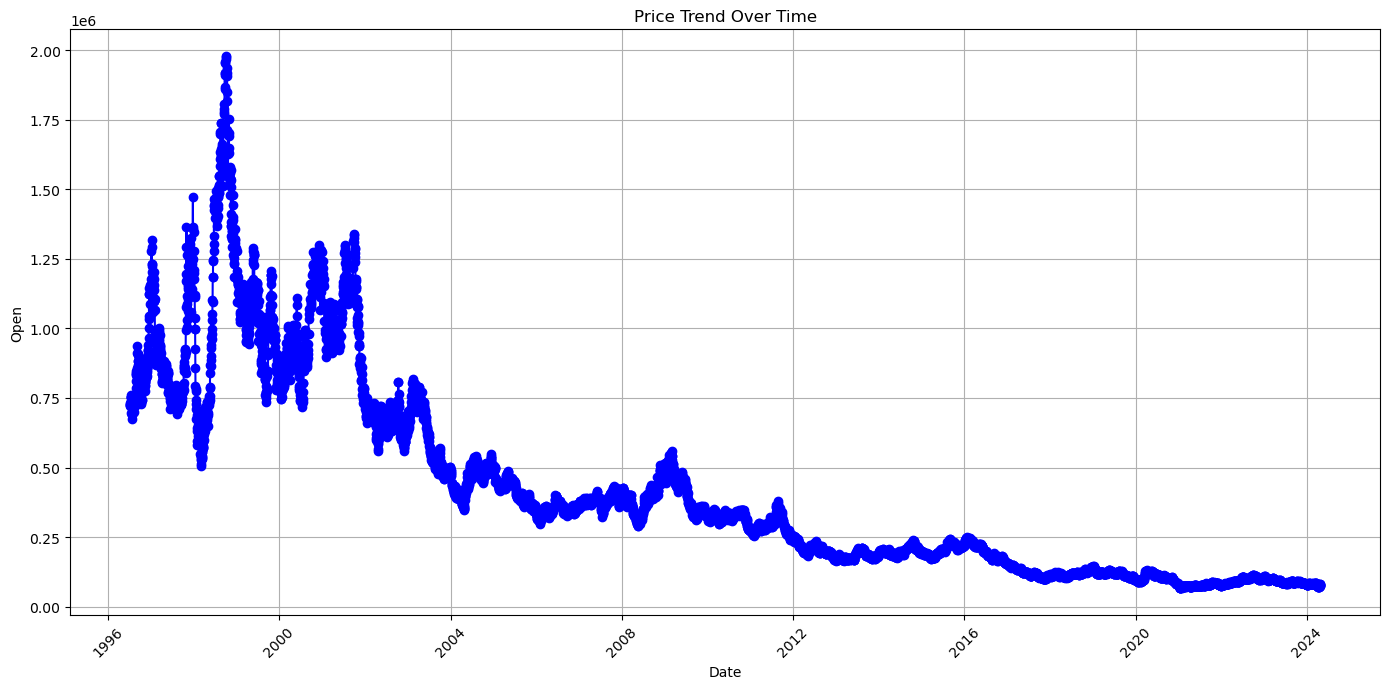

In [37]:
# Plotting
plt.figure(figsize=(14,7))
plt.plot(df_new['날짜'], df_new['저가'], marker='o', linestyle='-', color='b')
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Open')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  #
plt.show()

In [38]:
# 숫자형 열만 선택
numeric_columns = df_new.select_dtypes(include=['float64', 'int64'])

In [39]:
# 상관 행렬 계산
corr_matrix = numeric_columns.corr()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/pytho

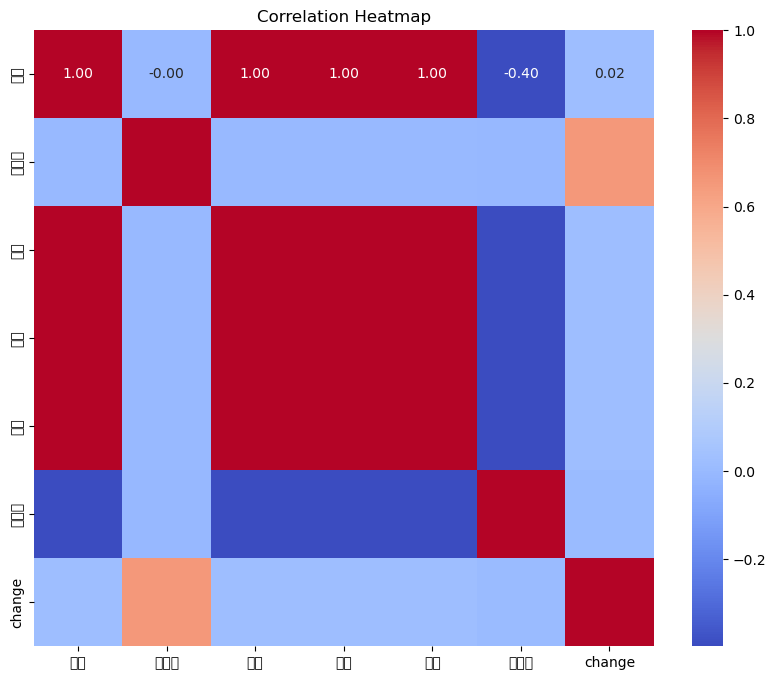

In [40]:
# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 세팅
# 인덱스로 출판 날짜 설정,  빈도 일별('D')로 설정
ts_data = df.set_index('날짜').resample('D').mean().interpolate()

# 시계열 분해 수행
# 데이터를 트렌드, 계절성, 잔차로 분해.
decomposition = seasonal_decompose(ts_data['종가'], model='additive')

# 시각화
plt.figure(figsize=(14, 8))

# 트렌드(Trend)
plt.subplot(311)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.tight_layout()

# 계절성(Seasonality)
plt.subplot(312)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()

# 잔차(Residual)
plt.subplot(313)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

ValueError: This function does not handle missing values

In [42]:
# def replace_outliers(data, n_std=3):
#     for column in ['종가', '전일비', '시가', '고가', '저가', '거래량', 'change']:
#         # 해당 컬럼의 평균과 표준 편차 계산
#         col_mean = data[column].mean()
#         col_std = data[column].std()

#         # Z-score 계산
#         z_scores = (data[column] - col_mean) / col_std
#         outliers = z_scores.abs() > n_std  # 설정한 표준 편차 이상의 값을 가진 이상치 판별

#         # 이상치를 중간값으로 대체
#         median_value = data[column].median()
#         data.loc[outliers, column] = median_value

#         # 이상치 대체 정보 로깅
#         print(f'{column} - {outliers.sum()} outliers replaced with median value {median_value}')

#     return data

In [43]:
# df_cleaned_new = replace_outliers(df_new)

In [44]:
df_new.columns

Index(['날짜', '종가', '전일비', '시가', '고가', '저가', '거래량', 'change'], dtype='object')

In [45]:
selected_feature = ['전일비', '시가', '고가', '저가', '거래량', 'change']

In [46]:
# 특성과 타겟 변수 선택
X = df_new[selected_feature]
y = df_new['종가']

# 데이터 분할
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.3, random_state=42)

In [47]:
# 선형 회귀 (Linear Regression)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# 릿지 회귀 (Ridge Regression)
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

# 의사결정 트리 (Decision Tree)
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

# 랜덤 포레스트 (Random Forest)
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# XGBoost (XGB)
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [48]:
# # 데이터 StandardScaling
# scaler = StandardScaler()
# df_scaled = pd.DataFrame(scaler.fit_transform(df_new[selected_features]), columns=selected_features)



# # 데이터 MinMaxScaling
# scaler = MinMaxScaler()
# df_scaled = pd.DataFrame(scaler.fit_transform(df_new[selected_features]), columns=selected_features)



# # 데이터 RobustScaling
# scaler = RobustScaler()
# df_scaled = pd.DataFrame(scaler.fit_transform(df_new[selected_features]), columns=selected_features)


# # 특성과 타겟 변수 선택
# X = df_scaled[selected_feature]
# y = df_new['종가']

# # 데이터 분할
# X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.3, random_state=42)